In [1]:
import matplotlib.pyplot as plt
import math
import os
from constants import *
from utility import *

In [2]:
instances = []
for split in splits:
    file_path = os.path.join(data_path, f"libriheavy_clean_{split}.jsonl")
    print("reading: ", file_path)
    with open(file_path, "r") as file:
        lines = file.readlines()
        for line in lines:
            jsonObj = json.loads(line.strip())
            jsonObj["match_result"] = read_match_result(jsonObj["match_result"])
            instances.append(jsonObj)
print("total number of instances: ", len(instances))

reading:  /home/mazhang/pt/libriheavy/libriheavy_clean_small.jsonl
reading:  /home/mazhang/pt/libriheavy/libriheavy_clean_medium.jsonl
reading:  /home/mazhang/pt/libriheavy/libriheavy_clean_dev.jsonl
reading:  /home/mazhang/pt/libriheavy/libriheavy_clean_test_clean.jsonl
reading:  /home/mazhang/pt/libriheavy/libriheavy_clean_test_clean_large.jsonl
reading:  /home/mazhang/pt/libriheavy/libriheavy_clean_test_other.jsonl
reading:  /home/mazhang/pt/libriheavy/libriheavy_clean_test_other_large.jsonl
total number of instances:  1277227


ratio of mismatched words/symbols to all words/symbols: 4.013781304056187%
0
39
8456343


Text(0, 0.5, 'number of instances')

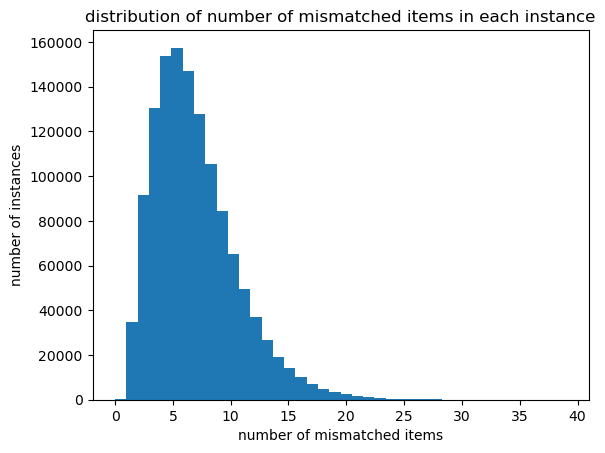

In [7]:
num_mismatched = []
similarity_ratio_list = []
total_num_words = 0
mismatched_words = 0
instances_with_long_mismatch = []
for ins in instances:
    num_mismatched.append(len(ins["mismatched_item"]))
    similarity_ratio_list.append(ins["similarity_ratio"])
    total_num_words += len(preprocess_for_match(ins["written"]).split(" "))
    total_num_words += len(preprocess_for_match(ins["spoken"]).split(" "))
    mismatch = ins["mismatched_item"]
    flag = True
    for item in mismatch:
        item = item.split("->")
        if len(item[0][1:-1]) != 0:
            temp = item[0][1:-1].split(" ")
            mismatched_words += len(temp)
            temp = [x for x in temp if x.isalpha()]
            # check mismatches with words more than 5
            if len(temp)>5 and flag:
                instances_with_long_mismatch.append(ins)
                flag = False
        if len(item[1][1:-1]) != 0:
            temp = item[1][1:-1].split(" ")
            mismatched_words += len(temp)
            temp = [x for x in temp if x.isalpha()]
            if len(temp)>5 and flag:
                instances_with_long_mismatch.append(ins)
                flag = False
print("ratio of mismatched words/symbols to all words/symbols: {}%".format(mismatched_words/total_num_words*100))
print(min(num_mismatched))
print(max(num_mismatched))
print(sum(num_mismatched))
plt.figure(1)
plt.hist(num_mismatched, bins=max(num_mismatched)-min(num_mismatched)+1)
plt.title("distribution of number of mismatched items in each instance")
plt.xlabel("number of mismatched items")
plt.ylabel("number of instances")

0.6
1.0
0.8851553609604659


Text(0, 0.5, 'number of instances')

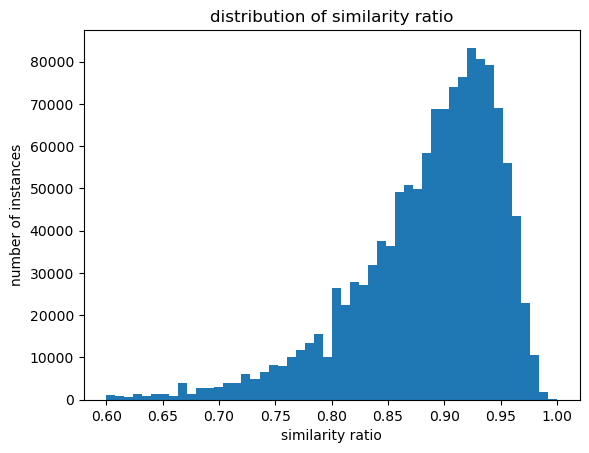

In [4]:
print(min(similarity_ratio_list))
print(max(similarity_ratio_list))
print(sum(similarity_ratio_list)/len(similarity_ratio_list))
plt.figure(1)
plt.hist(similarity_ratio_list, bins=50)
plt.title("distribution of similarity ratio")
plt.xlabel("similarity ratio")
plt.ylabel("number of instances")

In [5]:
instances_sortedby_ratio = sorted(instances, key=lambda x: x["similarity_ratio"])
instances_sortedby_ratio[:1000]

[{'written': 'Jim said: "Is dem figgers jist edjackly true, en no jokin\' en no lies, Mars Tom?" "Yes, they are; they\'re perfectly true."',
  'spoken': "JIM SAID IS DEM FIGURES JUST EXACTLY TRUE AND NO JOKING AN NO LIES MARS TOM YES THEY ARE THEY'RE PERFECTLY TRUE",
  'match_result': [('jim', 'jim'),
   ('said', 'said'),
   ([':', '"'], []),
   ('is', 'is'),
   ('dem', 'dem'),
   (['figgers', 'jist', 'edjackly'], ['figures', 'just', 'exactly']),
   ('true', 'true'),
   ([',', 'en'], ['and']),
   ('no', 'no'),
   (['jokin', "'", 'en'], ['joking', 'an']),
   ('no', 'no'),
   ('lies', 'lies'),
   ([','], []),
   ('mars', 'mars'),
   ('tom', 'tom'),
   (['?', '"', '"'], []),
   ('yes', 'yes'),
   ([','], []),
   ('they', 'they'),
   ('are', 'are'),
   ([';'], []),
   ('they', 'they'),
   ("'", "'"),
   ('re', 're'),
   ('perfectly', 'perfectly'),
   ('true', 'true'),
   (['.', '"'], [])],
  'similarity_ratio': 0.6,
  'mismatched_item': ['{: "}->{}',
   '{figgers jist edjackly}->{figures j

In [6]:
count = 0
ratio_threshold = 0.6
for ins in instances:
    if ins["similarity_ratio"] > 0.6:
        break
    count += 1
print(count)
print("percentage: {}%".format(count/len(instances)*100))

0
percentage: 0.0%


In [7]:
mismatched_items_frequency = {}
for ins in instances:
    for m in ins["mismatched_item"]:
        if m in mismatched_items_frequency:
            mismatched_items_frequency[m] += 1
        else:
            mismatched_items_frequency[m] = 1

mismatched_items_frequency = [(item, freq) for item, freq in mismatched_items_frequency.items()]
mismatched_items_frequency.sort(key = lambda x: x[1], reverse=True)
mismatched_items_frequency[:100]

[('{,}->{}', 3122895),
 ('{.}->{}', 1806804),
 ('{. "}->{}', 351739),
 ('{;}->{}', 303271),
 ('{"}->{}', 263816),
 ('{, "}->{}', 261509),
 ('{!}->{}', 109112),
 ('{?}->{}', 93193),
 ('{? "}->{}', 83283),
 ('{! "}->{}', 66832),
 ('{. " "}->{}', 60279),
 ('{_}->{}', 59466),
 ("{'}->{}", 52195),
 ('{:}->{}', 38830),
 ("{, '}->{}", 34870),
 ('{? " "}->{}', 34297),
 ("{. '}->{}", 29367),
 ('{: "}->{}', 27970),
 ('{mr .}->{mister}', 23501),
 ('{; "}->{}', 16907),
 ('{(}->{}', 15741),
 ('{mrs .}->{missus}', 12278),
 ('{)}->{}', 9243),
 ('{the}->{}', 8173),
 ('{}->{the}', 7408),
 ('{! " "}->{}', 7245),
 ('{the}->{a}', 7237),
 ("{? '}->{}", 7161),
 ("{! '}->{}", 6795),
 ('{a}->{}', 6516),
 ('{" "}->{}', 6076),
 ('{_ ,}->{}', 5956),
 ('{. . .}->{}', 5653),
 ('{, mr .}->{mister}', 5583),
 ('{a}->{the}', 5404),
 ("{. ' '}->{}", 5387),
 ('{mr}->{mister}', 5216),
 ('{}->{a}', 5041),
 ('{. . . .}->{}', 4942),
 ('{) ,}->{}', 4559),
 ('{}->{s}', 4281),
 ('{and}->{in}', 4270),
 ('{_ .}->{}', 4211),
 ('{

In [8]:
count = 0
for i, f in mismatched_items_frequency:
    if f>10:
        continue
    count += 1
print("total number of unique mismatched items", len(mismatched_items_frequency))
print("number of unique mismatched items with frequency less than 10: ", count)
print("percentage: {}%".format(count/len(mismatched_items_frequency)*100))

total number of unique mismatched items 581053
number of unique mismatched items with frequency less than 10:  569079
percentage: 97.93925855300635%


In [9]:
frequency = 0
for i, f in mismatched_items_frequency:
    if any(char.isalpha() for char in i):
        frequency += f
print("total number of mismatched items", sum(num_mismatched))
print("number of mismatched items that contains alphabets: ", frequency)
print("percentage: {}%".format(frequency/sum(num_mismatched)*100))

total number of mismatched items 8456343
number of mismatched items that contains alphabets:  1445803
percentage: 17.097260600711206%


In [10]:
# check frequent mismatched items
mismatched_items_frequency[:1000]

[('{,}->{}', 3122895),
 ('{.}->{}', 1806804),
 ('{. "}->{}', 351739),
 ('{;}->{}', 303271),
 ('{"}->{}', 263816),
 ('{, "}->{}', 261509),
 ('{!}->{}', 109112),
 ('{?}->{}', 93193),
 ('{? "}->{}', 83283),
 ('{! "}->{}', 66832),
 ('{. " "}->{}', 60279),
 ('{_}->{}', 59466),
 ("{'}->{}", 52195),
 ('{:}->{}', 38830),
 ("{, '}->{}", 34870),
 ('{? " "}->{}', 34297),
 ("{. '}->{}", 29367),
 ('{: "}->{}', 27970),
 ('{mr .}->{mister}', 23501),
 ('{; "}->{}', 16907),
 ('{(}->{}', 15741),
 ('{mrs .}->{missus}', 12278),
 ('{)}->{}', 9243),
 ('{the}->{}', 8173),
 ('{}->{the}', 7408),
 ('{! " "}->{}', 7245),
 ('{the}->{a}', 7237),
 ("{? '}->{}", 7161),
 ("{! '}->{}", 6795),
 ('{a}->{}', 6516),
 ('{" "}->{}', 6076),
 ('{_ ,}->{}', 5956),
 ('{. . .}->{}', 5653),
 ('{, mr .}->{mister}', 5583),
 ('{a}->{the}', 5404),
 ("{. ' '}->{}", 5387),
 ('{mr}->{mister}', 5216),
 ('{}->{a}', 5041),
 ('{. . . .}->{}', 4942),
 ('{) ,}->{}', 4559),
 ('{}->{s}', 4281),
 ('{and}->{in}', 4270),
 ('{_ .}->{}', 4211),
 ('{

Text(0, 0.5, 'frequency (log_10)')

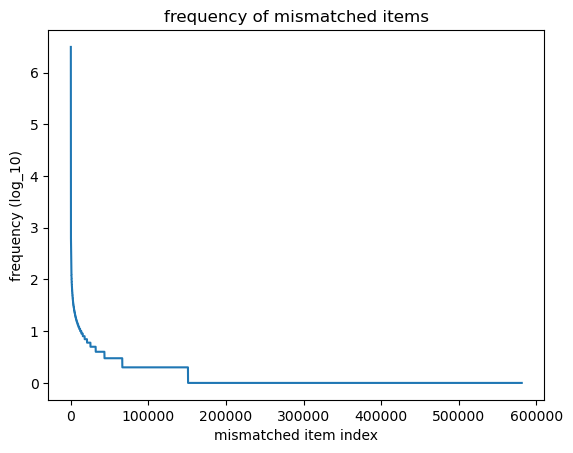

In [11]:
plt.figure(2)
plt.plot(range(len(mismatched_items_frequency)), [math.log(x[1], 10) for x in mismatched_items_frequency])
plt.title("frequency of mismatched items")
plt.xlabel("mismatched item index")
plt.ylabel("frequency (log_10)")

In [12]:
uncommon_symbols = "ãàÁÀÃÄÈÍÑòūìŭúüîíäûÉçïōöôëêéèâñóáýŒÆœæ§–"
uncommon_symbols_dict = {}
for char in uncommon_symbols:
    uncommon_symbols_dict[char] = {}
for ins in instances:
    for mismatch in ins["mismatched_item"]:
        for char in mismatch:
            if char in uncommon_symbols_dict:
                if mismatch in uncommon_symbols_dict[char]:
                    uncommon_symbols_dict[char][mismatch] += 1
                else:
                    uncommon_symbols_dict[char][mismatch] = 1
                break

In [13]:
for sym, cases in uncommon_symbols_dict.items():
    print(sym)
    for key, value in cases.items():
        print(key + ", " + str(value))

ã
à
Á
À
Ã
Ä
È
Í
Ñ
ò
ū
ì
ŭ
ú
ü
î
í
ä
û
É
ç
ï
ō
ö
ô
ë
ê
é
è
â
ñ
ó
á
ý
Œ
Æ
œ
æ
§
–


In [11]:
[instances_with_long_mismatch[i]["mismatched_item"] for i in range(len(instances_with_long_mismatch))]

[['{to the virgins , to make much of time}->{erlockstatt org by karen savage}',
  '{,}->{}',
  '{:}->{}',
  '{.}->{}'],
 ['{. 18th cent . 475 . prayer for indifference}->{read filibrevox dot org by karen savage}',
  '{,}->{}',
  '{;}->{}',
  '{,}->{}',
  '{.}->{}'],
 ['{b . 1861 877 . sheep and lambs}->{read philipprevoxt org by karen savage}',
  '{,}->{}',
  '{airs}->{heirs}',
  '{;}->{}',
  "{pass ' d}->{passed by}",
  '{by}->{}',
  '{.}->{}',
  "{5 pass ' d}->{passed by}",
  '{by}->{}',
  '{;}->{}',
  '{.}->{}'],
 ['{"}->{}',
  '{, "}->{}',
  '{mrs .}->{missus}',
  '{,}->{}',
  '{. "}->{}',
  '{, "}->{}',
  '{. "}->{}',
  '{,}->{}',
  '{, "}->{}',
  '{}->{the}',
  '{,}->{}',
  '{. and the opposite neighbor cried out something about whips ; and the wind was very high .}->{}',
  '{,}->{}',
  '{the}->{some}',
  '{,}->{}',
  '{;}->{}',
  '{round ,}->{around}',
  '{.}->{}',
  '{,}->{}',
  '{.}->{}'],
 ['{,}->{}',
  '{. "}->{}',
  '{? "}->{}',
  '{,}->{}',
  '{.}->{and of chapter five cha